# 任务分析
- 使用微软 14-18 年股价数据集训练模型
- 预测微软 19-22 年股价
- 模型调参选择最优模型
- 对预测结果进行可视化
- 分析预测结果

In [44]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model,model_selection
import pandas as pd

# 数据导入

In [45]:
data = pd.read_csv('ms_14-18.csv', delimiter=',')
data.head()
data.tail()

,Date,High Price,Low Price,Open Price,Close Price,Volume
0,2014-09-09 00:00:00,46.970001,46.419998,46.470001,46.759998,40302400.0
1,2014-09-10 00:00:00,46.939999,46.279999,46.820000,46.840000,27302400.0
2,2014-09-11 00:00:00,47.000000,46.470001,46.740002,47.000000,29216400.0
3,2014-09-12 00:00:00,47.020000,46.599998,46.910000,46.700001,38244700.0
4,2014-09-15 00:00:00,46.709999,46.099998,46.540001,46.240002,37667600.0


,Date,High Price,Low Price,Open Price,Close Price,Volume
1004,2018-09-04 00:00:00,111.959999,110.220001,110.849998,111.709999,22634600.0
1005,2018-09-05 00:00:00,111.419998,108.099998,111.010002,108.489998,32872400.0
1006,2018-09-06 00:00:00,108.989998,107.510002,108.250000,108.739998,23477600.0
1007,2018-09-07 00:00:00,108.720001,107.230003,108.230003,108.209999,22498600.0
1008,2018-09-10 00:00:00,109.639999,108.360001,108.839996,109.379997,20727900.0


# 数据探索
- Date 日期
- High Price 当日最高价
- Low Price 当日最低价
- Open Price 开盘价
- Close Price 收盘价
- Volume 成交量

# 特征工程

## 特征选择

In [46]:
features = [ "High Price", "Low Price" , "Open Price" ,"Volume"]

## 划分特征数据集为 训练集 80% 和 测试集 20%

In [47]:
X = np.array(data[features])
y = np.array(data["Close Price"])
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.1)

# 建立模型

## 创建线性回归模型

In [48]:
lin_reg = linear_model.LinearRegression()
# 用训练集训练模型
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# 模型调参

In [49]:
accuracy = lin_reg.score(X_test,y_test)
print("线性回归得分 = {}".format(accuracy))

线性回归得分 = 0.9997788519598834


# 模型使用

## 使用训练得出的模型对测试集预测

In [60]:
pred_close_price = lin_reg.predict(X_test)

# 结果可视化

<Figure size 1080x432 with 0 Axes>

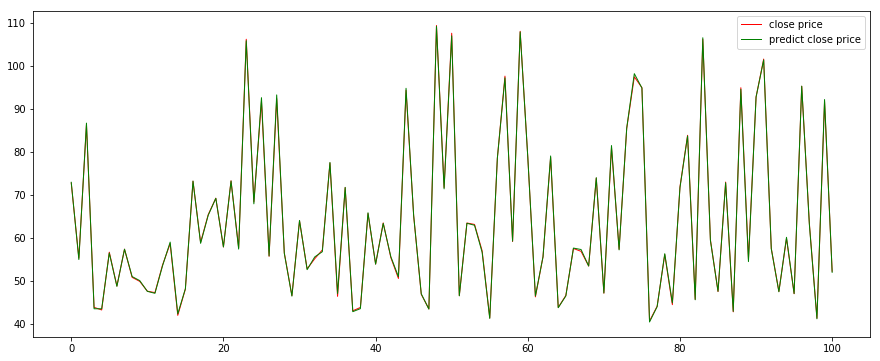

In [58]:
xpos = [i for i in range(len(y_test))]
plt.figure(figsize=(15, 6))
plt.plot(xpos, y_test, color='red', linewidth=1, label='close price')
plt.plot(xpos, pred_close_price, color='green', linewidth=1, label='predict close price')
plt.legend(loc='upper right')
plt.show()

# 结论分析

,Date,Open,High,Low,Close,Adj Close,Volume,Stock,SMA_50,T_SMA_50,...,EMA_21,T_EMA_21,EMA_50,T_EMA_50,EMA_200,T_EMA_200,MACD,SIGNAL,HIST,RSI
0,2019-06-03,123.849998,124.370003,119.010002,119.839996,115.725883,37983600,MSFT,NaN,False,...,120.0,False,120.0,False,120.0,False,0.000000,0.000000,0.000000,NaN
1,2019-06-04,121.279999,123.279999,120.650002,123.160004,118.931908,29382600,MSFT,NaN,False,...,120.0,True,120.0,True,120.0,True,0.264844,0.052969,0.211875,NaN
2,2019-06-05,124.949997,125.870003,124.209999,125.830002,121.510231,24926100,MSFT,NaN,False,...,121.0,True,120.0,True,120.0,True,0.682316,0.178838,0.503478,NaN
3,2019-06-06,126.440002,127.970001,125.599998,127.820000,123.431931,21459000,MSFT,NaN,False,...,121.0,True,120.0,True,120.0,True,1.160366,0.375144,0.785222,NaN
4,2019-06-07,129.190002,132.250000,128.259995,131.399994,126.889038,33885600,MSFT,NaN,False,...,122.0,True,121.0,True,120.0,True,1.807266,0.661568,1.145698,NaN


,Date,Open,High,Low,Close,Adj Close,Volume,Stock,SMA_50,T_SMA_50,...,EMA_21,T_EMA_21,EMA_50,T_EMA_50,EMA_200,T_EMA_200,MACD,SIGNAL,HIST,RSI
874,2022-11-17,237.779999,243.250000,237.630005,241.679993,241.679993,23123500,MSFT,238.31,True,...,236.0,True,241.0,True,263.0,False,0.704872,-1.525356,2.230228,54.047692
875,2022-11-18,243.509995,243.740005,239.029999,241.220001,241.220001,27591800,MSFT,237.85,True,...,237.0,True,241.0,True,262.0,False,0.976969,-1.024891,2.001860,53.657188
876,2022-11-21,241.429993,244.669998,241.190002,242.050003,242.050003,26394700,MSFT,237.36,True,...,237.0,True,241.0,True,262.0,False,1.245229,-0.570867,1.816096,54.298826
877,2022-11-22,243.589996,245.309998,240.710007,245.029999,245.029999,19665700,MSFT,237.22,True,...,238.0,True,241.0,True,262.0,False,1.678933,-0.120907,1.799840,56.621068
878,2022-11-23,245.104996,248.270004,244.270004,247.580002,247.580002,17718044,MSFT,237.12,True,...,239.0,True,241.0,True,262.0,False,2.203016,0.343878,1.859139,58.561480


<Figure size 1080x432 with 0 Axes>

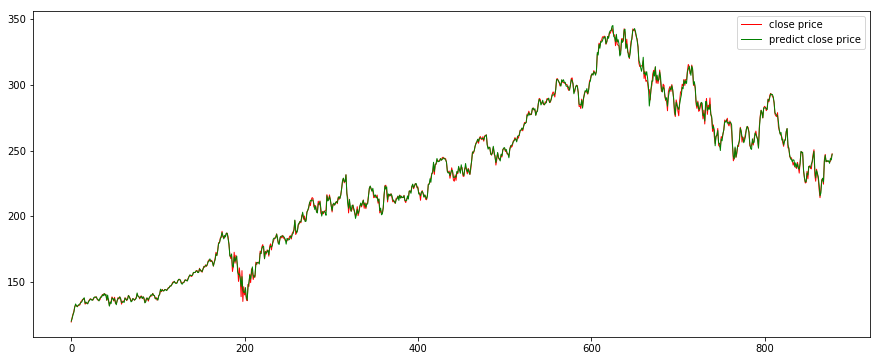

In [76]:
data = pd.read_csv('ms_19-22.csv', delimiter=',')
features = [ "High", "Low" , "Open" ,"Volume"]
X = np.array(data[features])
y = np.array(data["Close"])
data.head()
data.tail()
test = lin_reg.predict(X)
xpos = [i for i in range(len(test))]
plt.figure(figsize=(15, 6))
plt.plot(xpos, y, color='red', linewidth=1, label='close price')
plt.plot(xpos, test, color='green', linewidth=1, label='predict close price')
plt.legend(loc='upper right')
plt.show()

In [78]:
data['test'] = pd.Series(test)
data['Close'].head()
data['test'].head()

0    119.839996
1    123.160004
2    125.830002
3    127.820000
4    131.399994
Name: Close, dtype: float64

0    120.559920
1    122.492557
2    125.183373
3    127.109241
4    131.053478
Name: test, dtype: float64